<a href="https://colab.research.google.com/github/SantiagoArce7/CIENCIA_DATOS_2025/blob/main/Preguntas_Titanic_Santiago_Arce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
df=pd.read_csv("/content/titanic (1).csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
def bar_char(feature):
  survived=df[df['Survived']==1][feature].value_counts()
  dead=df[df['Survived']==0][feature].value_counts()
  test=pd.DataFrame([survived,dead])
  test.index=['Sobrevivientes','Muertos']
  test.plot(kind='bar',stacked=True,figsize=(10,5))

##De acuerdo a lo aprendido, llenar los espacios perdidos de embarcamiento y tarifa. Sacar conclusiones y responder las siguientes preguntas:

1. Según Wikipedia, se calcula que había 2.224 pasajeros y tripulantes a bordo del Titanic cuando se hundió. ¿De cuántos de ellos tenemos información en este conjunto de datos? De las personas de las que tenemos datos, ¿cuántas sobrevivieron y cuántas no? ¿Cuál es la tasa global de supervivencia?


2. ¿Cuántos pasajeros del Titanic eran hombres y cuántos mujeres? ¿Qué se obtiene cuando se desglosa por clase de billete?


3. ¿Cuántos pasajeros de cada sexo sobrevivieron y cuántos no? ¿Cuál es la tasa de supervivencia de los pasajeros de cada sexo?


4. ¿De cuántos pasajeros tenemos información sobre la edad (incluida la edad estimada)? ¿Para cuántos falta información sobre la edad? ¿Cuál es la distribución por edades de los pasajeros sobre los que se dispone de información?


5. Muestre la distribución de edad por clase de billete, por sexo. ¿Qué encuentra?


6. ¿Cómo afectan el sexo, la clase de billete y la edad de un pasajero a sus posibilidades de sobrevivir? Intenta utilizar un único gráfico para responder a esta pregunta.


7. Indique la distribución del número de miembros de la familia (incluidos hermanos, cónyuges, padres e hijos) que acompañaban a cada pasajero. ¿La mayoría de los pasajeros viajaban solos o con familia?


8. ¿En qué clase de billete viajaron la mayoría de las familias numerosas? ¿Y qué clase de billete tiene la menor proporción de pasajeras que viajaron solas de entre todas las pasajeras de esa clase?


9. En este conjunto de datos, la variable Tarifa no representa la tarifa por persona. En cambio, cada número de billete tiene una tarifa correspondiente, y algunos pasajeros comparten un único número de billete. Por lo tanto, la variable Tarifa es la tarifa total de un grupo de pasajeros que comparten el mismo número de billete. Sabiendo esto, calcule la tarifa media por persona. No es necesario que muestres una tabla o una cifra para esta pregunta, sólo muestra el código para el cálculo.


10. ¿Cuál es la distribución de la tarifa por billete para cada clase de billete?

In [16]:
#1. Según Wikipedia, se calcula que había 2.224 pasajeros y tripulantes a bordo del Titanic cuando se hundió. ¿De cuántos de ellos tenemos información en este conjunto de datos? De las personas de las que tenemos datos, ¿cuántas sobrevivieron y cuántas no? ¿Cuál es la tasa global de supervivencia?

df["Survived"].value_counts()

,count
Survived,
0,549
1,342


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
total_passengers = len(df)
survived_passengers = df['Survived'].sum()
survival_rate = survived_passengers / total_passengers
print(f"tasa global de supervivencia: {survival_rate:.2f}")

tasa global de supervivencia: 0.38


#De las 2.224 hay datos de 891 personas o del 40% de la gente, Sobrevivieron 342 personas, es decir una tasa de supervivencia del 38%

##¿Cuántos pasajeros del Titanic eran hombres y cuántos mujeres? ¿Qué se obtiene cuando se desglosa por clase de billete?

#### Habian 577 Hombres y 314 Mujeres, Distribuidos en 122 Hombres y 94 Mujeres en la clase 1, 108 Hombres y 76 Mujeres en la clase 2 y 347 Hombres y 144 Mujeres en la clase 3

In [19]:
df["Sex"].value_counts()

,count
Sex,
male,577
female,314


In [20]:
df.groupby("Pclass")["Sex"].value_counts()

Pclass  Sex   
1       male      122
        female     94
2       male      108
        female     76
3       male      347
        female    144
Name: count, dtype: int64

##¿Cuántos pasajeros de cada sexo sobrevivieron y cuántos no? ¿Cuál es la tasa de supervivencia de los pasajeros de cada sexo?

### Sobrevivieron 233 Hombres y Murieron 81 y Sobrevivieron 468 Mujeres y murieron 109, es decir que la tasa de supervivencia de los hombres y mujeres es del 18% y 74% respectivamente

In [21]:
df.groupby("Sex")["Survived"].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [22]:
survival_rate_sex = df.groupby('Sex')['Survived'].mean()
survival_rate_sex

,Survived
Sex,
female,0.742038
male,0.188908


##¿De cuántos pasajeros tenemos información sobre la edad (incluida la edad estimada)? ¿Para cuántos falta información sobre la edad? ¿Cuál es la distribución por edades de los pasajeros sobre los que se dispone de información?

### Se tiene la Información de la edad de 714 personas, hacen falta 277 personas por edad, entre los que tenemos información hay: 220 que están entre los 20-30,167 entre los 30-40, 102 entre los 10-20, 89 entre los 40-50, 52 entre los 0-10, 48 entre los 50-60, 19 entre los 60-70, 6 entre los 70-80, 1 entre los 80-90 y 0 mayor de 90 años


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
df["Age_category"]=pd.cut(df["Age"],bins=[0,10,20,30,40,50,60,70,80,90,float("inf")],labels=[0,10,20,30,40,50,60,70,80,90,],right=False)

In [25]:
Age_category_counts=df["Age_category"].value_counts()
Age_category_counts

,count
Age_category,
20,220
30,167
10,102
40,89
0,62
50,48
60,19
70,6
80,1


##Muestre la distribución de edad por clase de billete, por sexo. ¿Qué encuentra?

### Se ecuentra mayor frecuencia de hombre las clases altas que las mujeres, sin embargo las mujeres estan mas distribuidas entre las clases que los hombre

In [26]:
df.groupby(['Pclass', 'Sex'])['Age'].describe()

count       mean        std   min     25%   50%    75%   max
Pclass Sex                                                                 
1      female   85.0  34.611765  13.612052  2.00  23.000  35.0  44.00  63.0
       male    101.0  41.281386  15.139570  0.92  30.000  40.0  51.00  80.0
2      female   74.0  28.722973  12.872702  2.00  22.250  28.0  36.00  57.0
       male     99.0  30.740707  14.793894  0.67  23.000  30.0  36.75  70.0
3      female  102.0  21.750000  12.729964  0.75  14.125  21.5  29.75  63.0
       male    253.0  26.507589  12.159514  0.42  20.000  25.0  33.00  74.0

##¿Cómo afectan el sexo, la clase de billete y la edad de un pasajero a sus posibilidades de sobrevivir? Intenta utilizar un único gráfico para responder a esta pregunta.

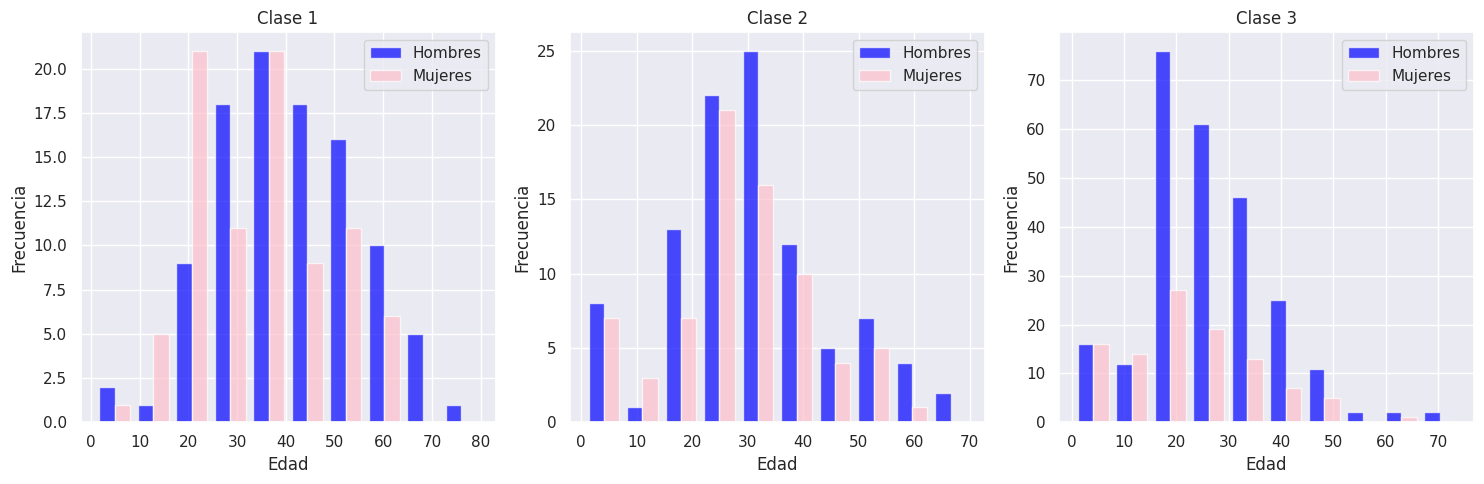

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, clase in enumerate([1, 2, 3]):
    datos_clase = df[df['Pclass'] == clase]
    axes[i].hist([datos_clase[datos_clase['Sex']=='male']['Age'].dropna(),
                 datos_clase[datos_clase['Sex']=='female']['Age'].dropna()],
                alpha=0.7, label=['Hombres', 'Mujeres'], color=['blue', 'pink'])
    axes[i].set_title(f'Clase {clase}')
    axes[i].set_xlabel('Edad')
    axes[i].set_ylabel('Frecuencia')
    axes[i].legend()

plt.tight_layout()
plt.show()

##Indique la distribución del número de miembros de la familia (incluidos hermanos, cónyuges, padres e hijos) que acompañaban a cada pasajero. ¿La mayoría de los pasajeros viajaban solos o con familia?

###La mayoria de pasajeros viajaban solos

In [28]:
df["SibSp"].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


##¿En qué clase de billete viajaron la mayoría de las familias numerosas? ¿Y qué clase de billete tiene la menor proporción de pasajeras que viajaron solas de entre todas las pasajeras de esa clase?

###El billete en el que viajaron la mayoria de familias numerosas es el 3, el cual tambien tiene menor proporción de viajeros solitarios

In [30]:
df.groupby(['Pclass', 'SibSp'])['Age'].describe()

count       mean        std    min    25%   50%    75%   max
Pclass SibSp                                                              
1      0      113.0  39.181416  14.844591   4.00  28.00  37.0  50.00  80.0
       1       65.0  37.414154  14.690355   0.92  28.00  38.0  49.00  70.0
       2        5.0  37.200000  16.513631  18.00  21.00  44.0  50.00  53.0
       3        3.0  22.000000   2.645751  19.00  21.00  23.0  23.50  24.0
2      0      109.0  31.934220  13.486824   0.83  23.00  30.0  39.00  70.0
       1       55.0  27.363636  14.609811   0.67  21.50  29.0  35.00  60.0
       2        8.0  19.125000  10.776131   1.00  16.75  23.5  24.00  32.0
       3        1.0  30.000000        NaN  30.00  30.00  30.0  30.00  30.0
3      0      249.0  27.630201  11.501377   0.42  20.00  26.0  33.00  74.0
       1       63.0  24.912698  11.439018   1.00  17.50  25.0  32.50  48.0
       2       12.0  18.875000  13.276560   0.75   8.00  19.5  26.50  41.0
       3        8.0   8.875000  10.260013   2.00   2.75   6.0   9.25  33.0
       4       18.0   7.055556   4.880601   1.00   3.25   6.5   9.00  17.0
       5        5.0  10.200000   5.805170   1.00   9.00  11.0  14.00  16.0
       8        0.0        NaN        NaN    NaN    NaN   NaN    NaN   NaN

##En este conjunto de datos, la variable Tarifa no representa la tarifa por persona. En cambio, cada número de billete tiene una tarifa correspondiente, y algunos pasajeros comparten un único número de billete. Por lo tanto, la variable Tarifa es la tarifa total de un grupo de pasajeros que comparten el mismo número de billete. Sabiendo esto, calcule la tarifa media por persona. No es necesario que muestres una tabla o una cifra para esta pregunta, sólo muestra el código para el cálculo.

In [32]:
fare_per_ticket = df.groupby('Ticket')['Fare'].sum()
passengers_per_ticket = df.groupby('Ticket').size()
average_fare_per_person_per_ticket = fare_per_ticket / passengers_per_ticket
average_fare_per_person = average_fare_per_person_per_ticket.mean()

average_fare_per_person

np.float64(23.274580102790015)

##¿Cuál es la distribución de la tarifa por billete para cada clase de billete?

In [34]:
fare_per_ticket = df.groupby('Ticket')['Fare'].sum()
passengers_per_ticket = df.groupby('Ticket').size()
average_fare_per_person_per_ticket = fare_per_ticket / passengers_per_ticket

df['AvgFarePerPerson'] = df['Ticket'].map(average_fare_per_person_per_ticket)

df.groupby('Pclass')['AvgFarePerPerson'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778125,0.0,7.75000,8.0500,15.5,69.5500
